# Lab 1: Базові алгоритми класифікації з використанням бібліотеки Scikit-learn

In [1]:
from google.colab import drive

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing, utils, tree, svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

Хід роботи:

1. Завантажити дані, вивести назви колонок і розмір датасета

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# upload data
df = pd.read_csv('/content/drive/MyDrive/IPT masters/9 sem/Інтелектуальний аналіз даних/lab1/smoking_driking_dataset.csv')
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [4]:
list(df.columns)

['sex',
 'age',
 'height',
 'weight',
 'waistline',
 'sight_left',
 'sight_right',
 'hear_left',
 'hear_right',
 'SBP',
 'DBP',
 'BLDS',
 'tot_chole',
 'HDL_chole',
 'LDL_chole',
 'triglyceride',
 'hemoglobin',
 'urine_protein',
 'serum_creatinine',
 'SGOT_AST',
 'SGOT_ALT',
 'gamma_GTP',
 'SMK_stat_type_cd',
 'DRK_YN']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

2. Опрацювати пропуски (по можливості заповнити їх або видалити)

In [6]:
# drop na
df = df.dropna()

# drop duplicates
df = df.drop_duplicates()

In [7]:
# encode sex
label_encoder = preprocessing.LabelEncoder()
df['sex']= label_encoder.fit_transform(df['sex'])

# encode DRK_YN
encode = {"DRK_YN": {"Y": 1, "N": 0}}
df = df.replace(encode)

df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0


In [8]:
def remove_outliers(df, columns, n_std):
    for col in columns:
        print('Working on column: {}'.format(col))

        mean = df[col].mean()
        sd = df[col].std()

        df = df[(df[col] <= mean+(n_std*sd))]

    return df

print(remove_outliers(df, df.columns, 2))

Working on column: sex
Working on column: age
Working on column: height
Working on column: weight
Working on column: waistline
Working on column: sight_left
Working on column: sight_right
Working on column: hear_left
Working on column: hear_right
Working on column: SBP
Working on column: DBP
Working on column: BLDS
Working on column: tot_chole
Working on column: HDL_chole
Working on column: LDL_chole
Working on column: triglyceride
Working on column: hemoglobin
Working on column: urine_protein
Working on column: serum_creatinine
Working on column: SGOT_AST
Working on column: SGOT_ALT
Working on column: gamma_GTP
Working on column: SMK_stat_type_cd
Working on column: DRK_YN
        sex  age  height  weight  waistline  sight_left  sight_right  \
0         1   35     170      75       90.0         1.0          1.0   
1         1   30     180      80       89.0         0.9          1.2   
2         1   40     165      75       91.0         1.2          1.5   
4         1   50     165      

In [9]:
df = df.drop(df[(df['waistline'] > 200) | (df['waistline'] < 10)].index)
df = df.drop(df[(df['height'] > 250) | (df['height'] < 100)].index)

3. Візуалізувати дані:
  1. побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою);


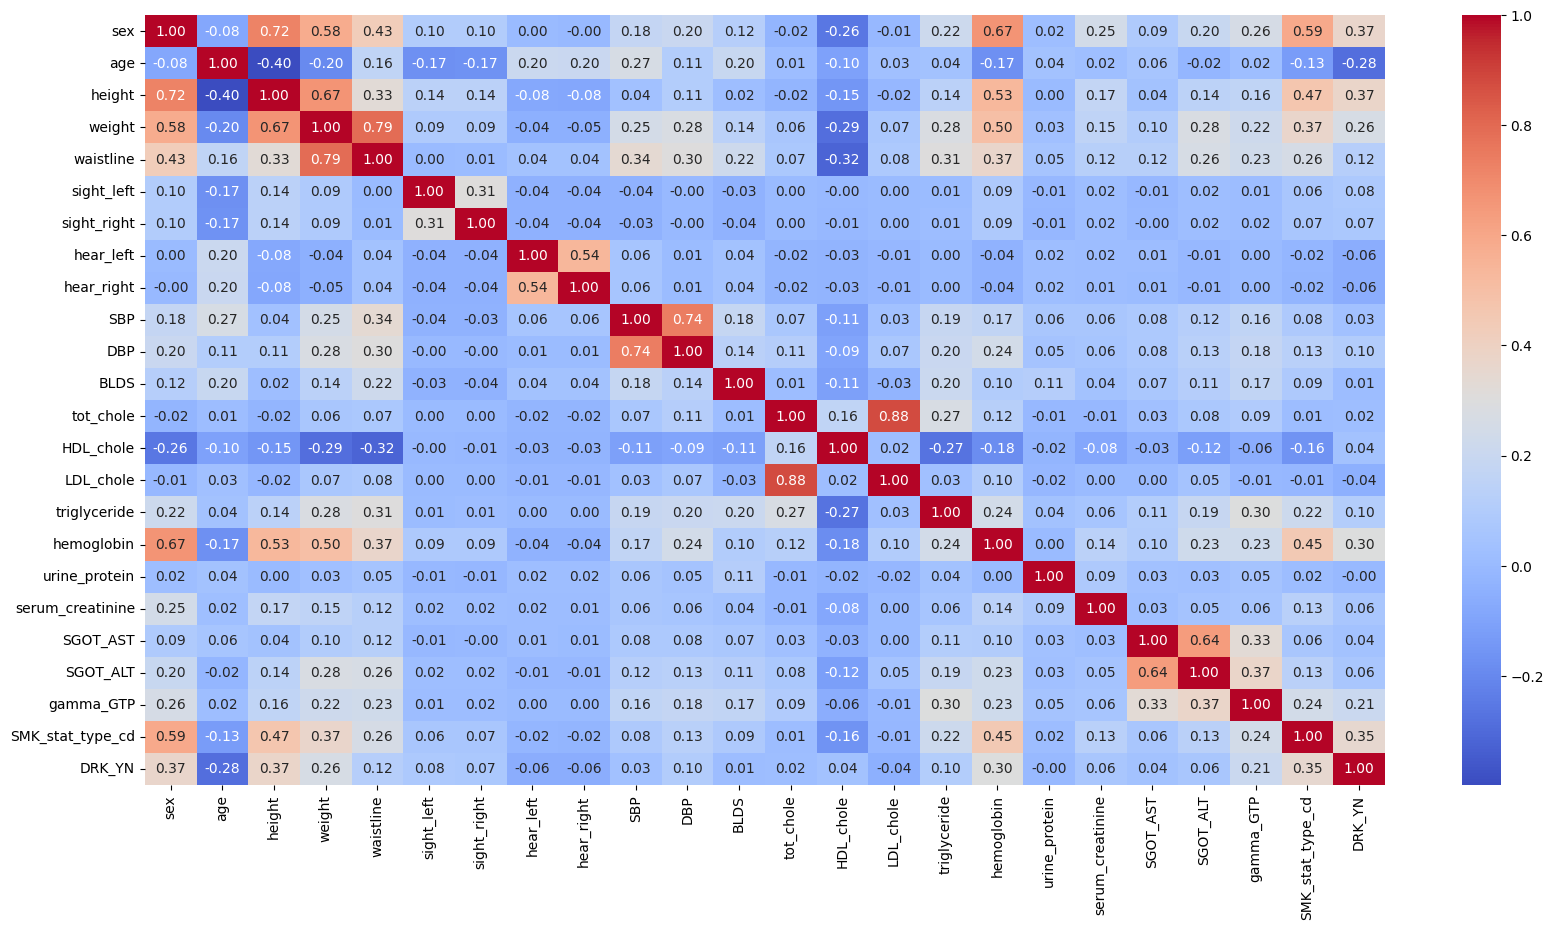

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

In [11]:
df = df.drop(['sight_left', 'sight_right', 'hear_right', 'hear_left', 'urine_protein', 'serum_creatinine', 'triglyceride', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'SGOT_AST', 'SGOT_ALT', 'LDL_chole', 'HDL_chole'], axis=1)

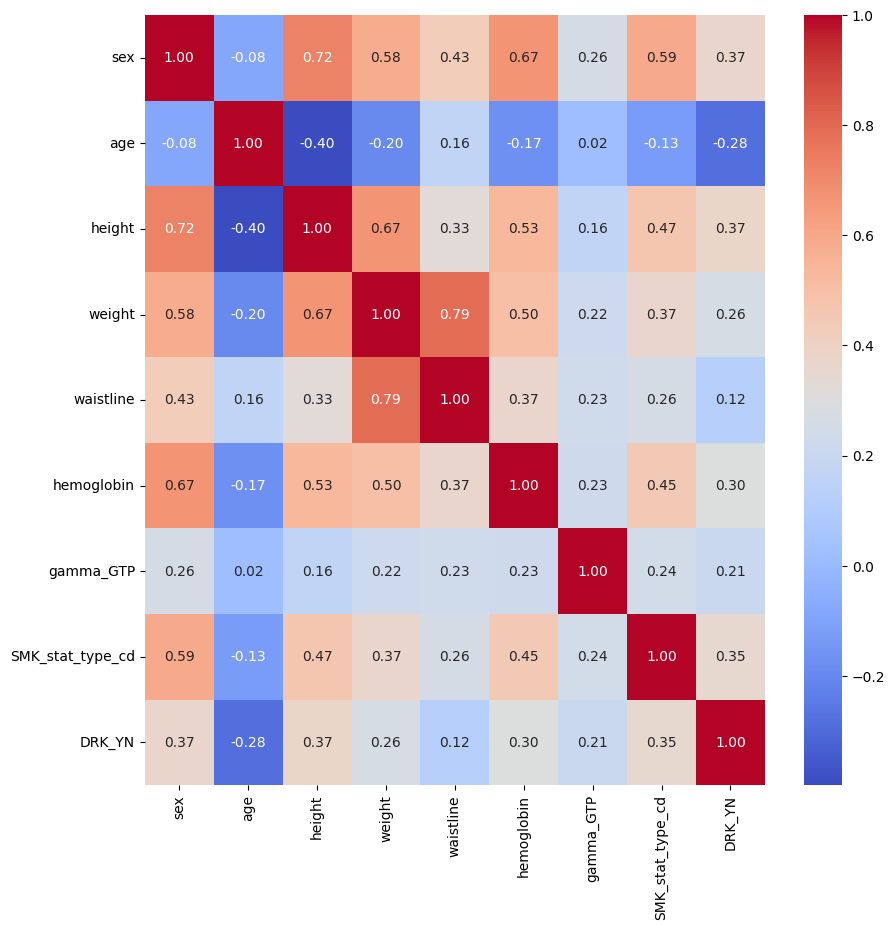

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

  2. Побудувати гістограми розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато
обмежитися декількома)

array([[<Axes: title={'center': 'sex'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'waistline'}>,
        <Axes: title={'center': 'hemoglobin'}>],
       [<Axes: title={'center': 'gamma_GTP'}>,
        <Axes: title={'center': 'SMK_stat_type_cd'}>,
        <Axes: title={'center': 'DRK_YN'}>]], dtype=object)

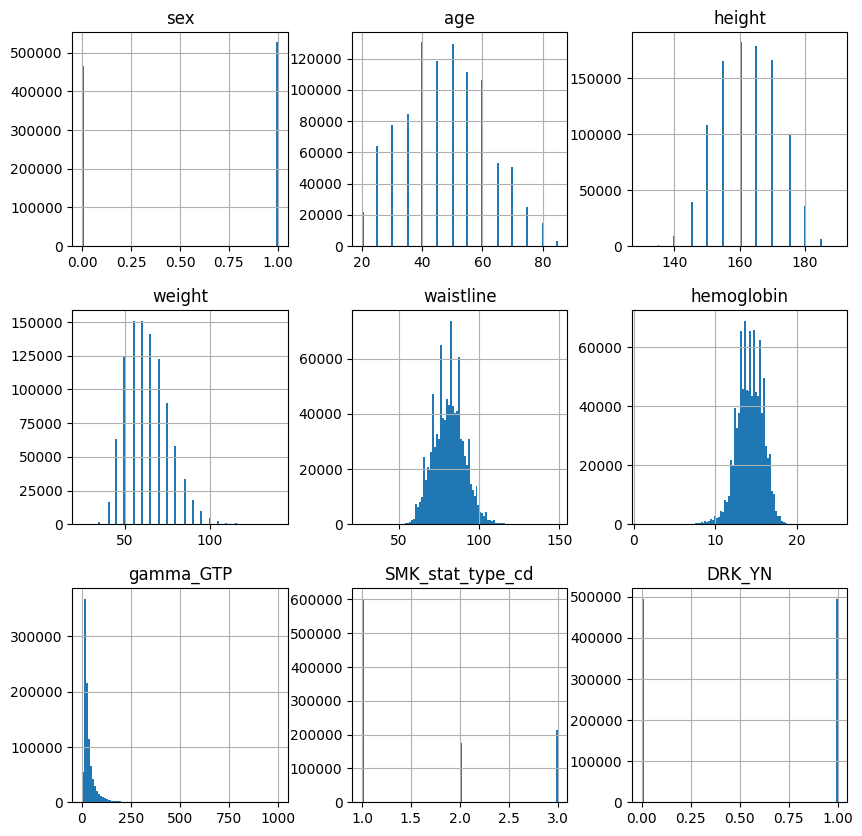

In [ ]:
# histograms
df.hist(bins=100, figsize=(10, 10))

<Axes: xlabel='sex', ylabel='age'>

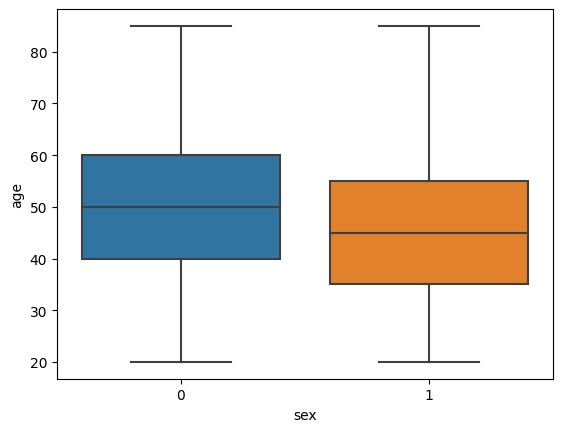

In [ ]:
sns.boxplot(x="sex", y="age", data=df)

<Axes: xlabel='sex', ylabel='height'>

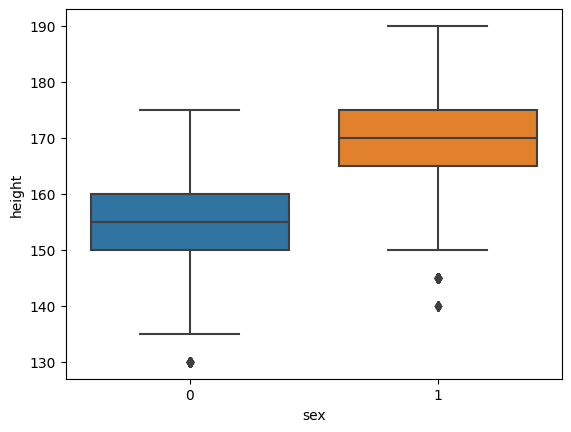

In [ ]:
sns.boxplot(x="sex", y="height", data=df)

<Axes: xlabel='sex', ylabel='weight'>

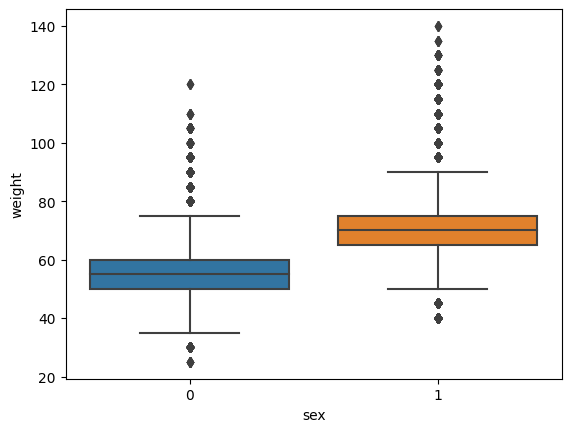

In [ ]:
sns.boxplot(x="sex", y="weight", data=df)

<Axes: xlabel='sex', ylabel='waistline'>

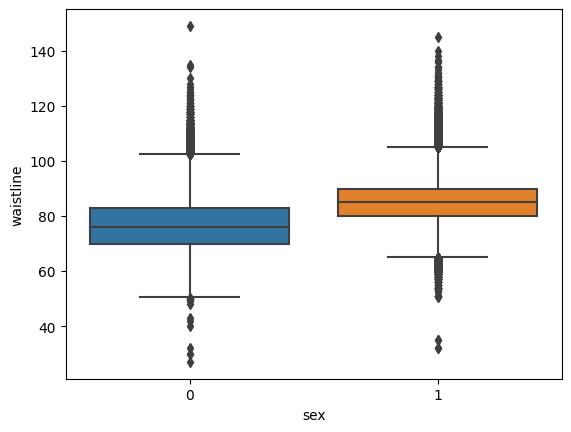

In [ ]:
sns.boxplot(x="sex", y="waistline", data=df)

4. Нормалізувати дані

In [12]:
scaler = MinMaxScaler()
scaler.fit(df)
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)

5. Провести навчання класифікаторів

In [13]:
# reduce the size (to make the process faster)
df_1 = scaled_df.iloc[:50000,:]

# split dataset into parts
X = df_1.drop(['sex'], axis = 1)
y = df_1['sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

5.1. kNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

#predicting test set results
y_pred = knn.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      4677
         1.0       0.95      0.95      0.95      5323

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

[[4423  254]
 [ 249 5074]]


Спробуємо підібрати оптимальні параметри для kNN.

0.9557


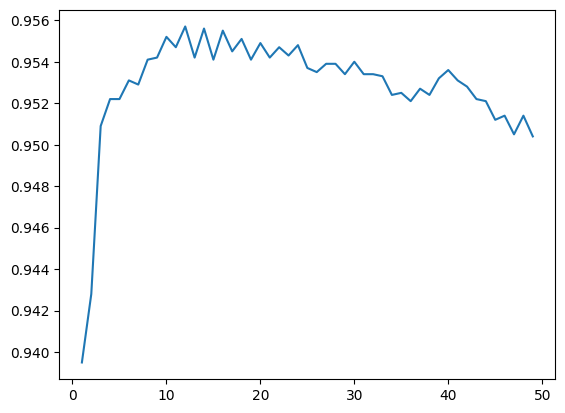

In [20]:
scores = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

plt.plot(range(1,50),scores)

За графіком можемо побачити, що оптимальне значення знаходиться у проміжку n=(9, 20), а саме:

In [25]:
print(scores.index(max(scores)))

11


  5.2. Дерево ухвалення рішень (decision tree)

In [33]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [34]:
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      4702
         1.0       0.92      0.92      0.92      5298

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

[[4299  403]
 [ 409 4889]]


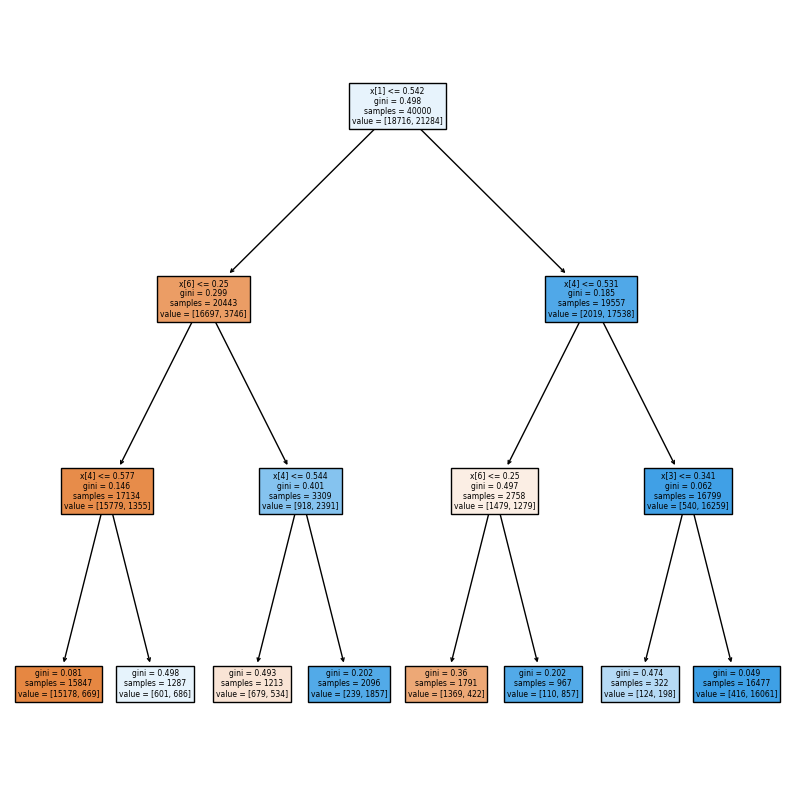

In [35]:
plt.figure(figsize = (10, 10))
plot_tree(model, filled = True)
plt.show()

3. SVM

In [ ]:
svm_alg = svm.SVC()
svm_alg.fit(X_train, y_train)
y_pred = svm_alg.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      4677
         1.0       0.96      0.96      0.96      5323

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

[[4473  204]
 [ 224 5099]]


Спробуємо підібрати оптимальні параметри.

In [ ]:
k = {'C': [0.1, 1, 10, 100, 1000, 10000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]}
svm_alg = GridSearchCV((svm.SVC()), k)
svm_alg.fit(X_train, y_train)
print(svm_alg.best_params_)

{'C': 1000, 'gamma': 1}


4. Random Forest

In [ ]:
r_forest = RandomForestClassifier()
r_forest.fit(X_train, y_train)
y_pred = r_forest.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      4677
         1.0       0.96      0.96      0.96      5323

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

[[4458  219]
 [ 222 5101]]


5. AdaBoost

In [ ]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      4677
         1.0       0.96      0.96      0.96      5323

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

[[4459  218]
 [ 219 5104]]
